## Importing libraries

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import weibull_min
from scipy.stats import skewnorm
from scipy.stats import norm
import numpy as np

## Mean vs median skewed

In [48]:
def plot_dist_with_lines(xx, fun, vert_lines, colors, ax, labels = False):

    yy = fun(xx)
    ax.plot(xx, yy, color = colors[0], lw = 4)
    for i, vert_line in enumerate(vert_lines):
        if labels:
            ax.plot([vert_line, vert_line], [0, fun(vert_line)], color = colors[1 + i], lw = 4, linestyle = '--', label = labels[i], alpha = 0.5)
        else:
            ax.plot([vert_line, vert_line], [0, fun(vert_line)], color = colors[1 + i], lw = 4, linestyle = '--', alpha = 0.5)
    
    ax.set_ylim([0, 1])
    ax.legend(frameon = False, prop={'size': 20}, bbox_to_anchor=[0.8, 0.8, 0.2, 0.2])
    ax.set_yticks([])
    ax.set_xticks([])
    ax.axis('off')
    return

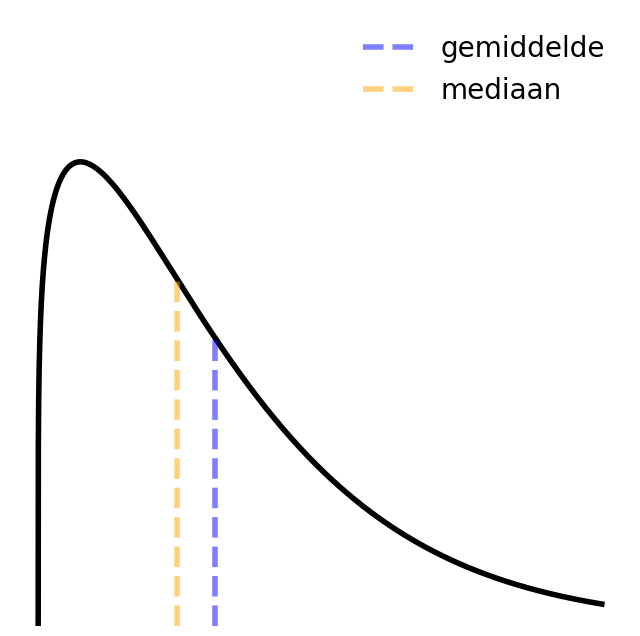

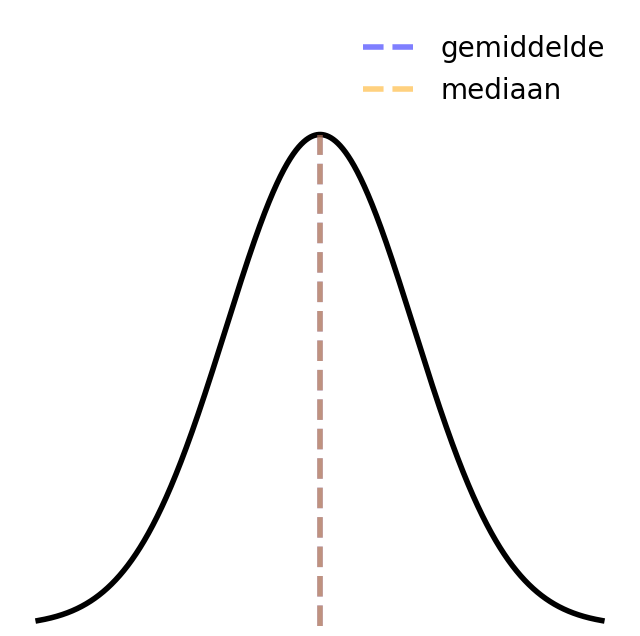

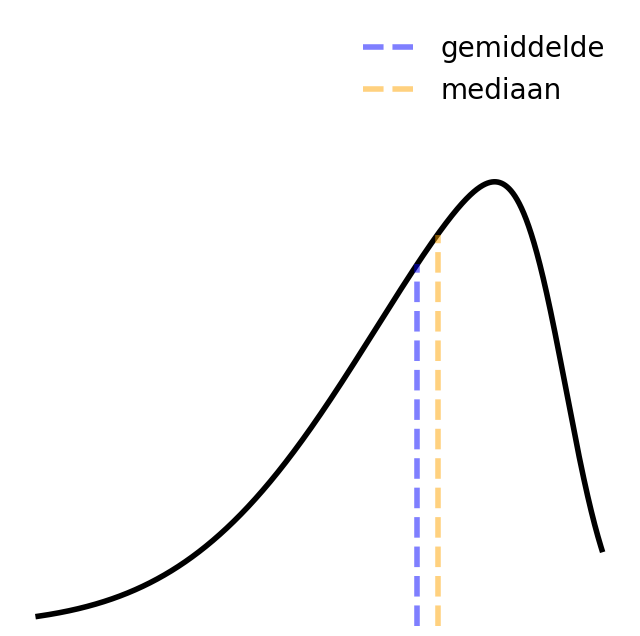

In [49]:
xx = np.linspace(0, 3, num = 10**4)

## Right skewed dist
c_weib = 1.2
fun_weibull = lambda x : weibull_min.pdf(x, c = c_weib)
vert_lines_weibull = [weibull_min.mean(c = c_weib), weibull_min.median(c = c_weib)]

## Symmetric dist
fun_normal = lambda x : norm.pdf(x, loc = 1.5, scale = 0.5)
vert_lines_normal = [norm.mean(loc = 1.5, scale = 0.5), norm.median(loc = 1.5, scale = 0.5)]

## Left skewed dist
skewness = -5
loc = 2.8
fun_skewnorm = lambda x : skewnorm.pdf(x, a = skewness, loc = loc)
vert_lines_skewnorm = [skewnorm.mean(a = skewness, loc = loc), skewnorm.median(a = skewness, loc = loc)]
xx_left = xx[::-1]

labels = ['gemiddelde', 'mediaan']
colors = ['k', 'b', 'orange']

fig , ax = plt.subplots(figsize = (8, 8))
plot_dist_with_lines(xx, fun_weibull, vert_lines_weibull, colors, ax, labels = labels)
fig , ax = plt.subplots(figsize = (8, 8))
plot_dist_with_lines(xx, fun_normal, vert_lines_normal, colors, ax, labels = labels)
fig , ax = plt.subplots(figsize = (8, 8))
plot_dist_with_lines(xx, fun_skewnorm, vert_lines_skewnorm, colors, ax, labels = labels)


## Kwartielen/percentielen

(-0.15000000000000002, 3.15, 0.0, 1.0)

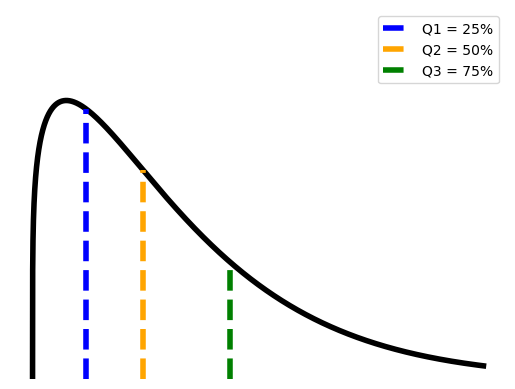

In [5]:
xx = np.linspace(0, 3, num = 10**4)

## Right skewed dist
c_weib = 1.2
fun_weibull = lambda x : weibull_min.pdf(x, c = c_weib)
vert_lines_weibull = [weibull_min.ppf(.25, c_weib), weibull_min.ppf(.5, c_weib), weibull_min.ppf(.75, c_weib)]

fig , ax = plt.subplots()
plot_dist_with_lines(xx, fun_weibull, vert_lines_weibull, ['k', 'b', 'orange', 'green'], ax, labels = ['Q1 = 25%', 'Q2 = 50%', 'Q3 = 75%'])
ax.set_ylim([0, 1])
ax.legend()
ax.axis('off')
#ax.set_yticks([])
#ax.set_xticks([])